<a href="https://colab.research.google.com/github/sharulshafie/Used-Car-Price-Prediction-by-Scratch/blob/main/Used_Car_Price_Prediction_by_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d harikrishnareddyb/used-car-price-predictions
! unzip used-car-price-predictions.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
 99% 17.0M/17.2M [00:01<00:00, 16.5MB/s]
100% 17.2M/17.2M [00:01<00:00, 9.64MB/s]
Archive:  used-car-price-predictions.zip
  inflating: true_car_listings.csv   


In [ ]:
! pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

import sweetviz as sv 
import IPython

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

In [ ]:
df = pd.read_csv("/content/used-car-price-predictions.zip")
df = df.drop(['Vin', 'City', 'Model'], axis=1)

#one-hot encoded
df = pd.get_dummies(df, columns=["State", "Make"])

#min-max scaler 
scaler = MinMaxScaler()
df[["Price", "Year", "Mileage"]] = scaler.fit_transform(df[["Price", "Year", "Mileage"]])

In [ ]:
df.describe()

,Price,Year,Mileage,State_ AK,State_ AL,State_ AR,State_ AZ,State_ Az,State_ CA,State_ CO,...,Make_Saab,Make_Saturn,Make_Scion,Make_Subaru,Make_Suzuki,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,Make_smart
count,852122.000000,852122.000000,852122.000000,852122.000000,852122.000000,852122.000000,852122.000000,852122.000000,852122.000000,852122.000000,...,852122.000000,852122.000000,852122.000000,852122.000000,852122.000000,852122.000000,852122.000000,852122.000000,852122.000000,852122.000000
mean,0.040089,0.775674,0.018382,0.001952,0.015600,0.008158,0.026288,0.000074,0.094396,0.026996,...,0.000305,0.001130,0.003571,0.019279,0.000392,0.000271,0.091285,0.027284,0.005992,0.000837
std,0.027302,0.162618,0.014701,0.044134,0.123922,0.089955,0.159992,0.008598,0.292379,0.162072,...,0.017465,0.033598,0.059652,0.137504,0.019794,0.016463,0.288014,0.162909,0.077176,0.028914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.023092,0.714286,0.008344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.034137,0.809524,0.014093,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.051195,0.904762,0.025272,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.head()

,Price,Year,Mileage,State_ AK,State_ AL,State_ AR,State_ AZ,State_ Az,State_ CA,State_ CO,...,Make_Saab,Make_Saturn,Make_Scion,Make_Subaru,Make_Suzuki,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,Make_smart
0,0.015050,0.809524,0.012506,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.018851,0.761905,0.006863,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.015050,0.761905,0.017102,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.019074,0.809524,0.013976,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.026705,0.904762,0.007751,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.drop('Price', axis=1).values
y = df[['Price']].values

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def mean_squared_error(predictions, lables):
  N = lables.size
  mse = ((predictions - lables)**2).sum() / (2*N)
  return mse

def accuracy(predictions, lables):
  preds = predictions.round() == lables
  acc = preds.mean()
  return acc

In [ ]:
lr = 0.2
ep = 100
N = train_y.size

n_input = train_X.shape[1]
n_hidden_1 = 60 
n_hidden_2 = 10 
n_output = 1 

In [ ]:
np.random.seed(20)

weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden_1))     # (119, 60)
weights_2 = np.random.normal(scale=0.5, size=(n_hidden_1, n_hidden_2))  # (60, 10)
weights_3 = np.random.normal(scale=0.5, size=(n_hidden_2, n_output))    # (10, 1)

In [ ]:
monitoring = {'mean_squared_error': [], 'accuracy': []}

for epochs in range(ep):

  #feedforward 
  hidden_layer_1 = sigmoid(np.dot(train_X, weights_1))          # (681697, 60)
  hidden_layer_2 = sigmoid(np.dot(hidden_layer_1, weights_2))   # (681697, 10)
  output_layer = sigmoid(np.dot(hidden_layer_2, weights_3))     # (681697, 1)

  #monitoring 
  mse = mean_squared_error(output_layer, train_y)
  acc = accuracy(output_layer, train_y)
  monitoring['mean_squared_error'].append(mse)
  monitoring['accuracy'].append(acc)

  #backpropagate
  output_delta = (output_layer - train_y) * output_layer * (1 - output_layer)                   # (681697, 1)
  hidden_2_delta = np.dot(output_delta, weights_3.T) * hidden_layer_2 * (1 - hidden_layer_2)    # (681697, 10)
  hidden_1_delta = np.dot(hidden_2_delta, weights_2.T) * hidden_layer_1 * (1 - hidden_layer_1)  # (681697, 60)

  #weight changes 
  weights_3 -= lr * np.dot(hidden_layer_2.T, output_delta) / N      # (10, 1)
  weights_2 -= lr * np.dot(hidden_layer_1.T, hidden_2_delta) / N    # (60, 10)
  weights_1 -= lr * np.dot(train_X.T, hidden_1_delta) / N           # (119, 60)

monitoring_df = pd.DataFrame(monitoring)

In [ ]:
monitoring_df

,mean_squared_error,accuracy
0,0.029081,0.000104
1,0.026020,0.000104
2,0.023425,0.000104
3,0.021209,0.000104
4,0.019304,0.000104
...,...,...
95,0.001248,0.000104
96,0.001234,0.000104
97,0.001221,0.000104
98,0.001207,0.000104


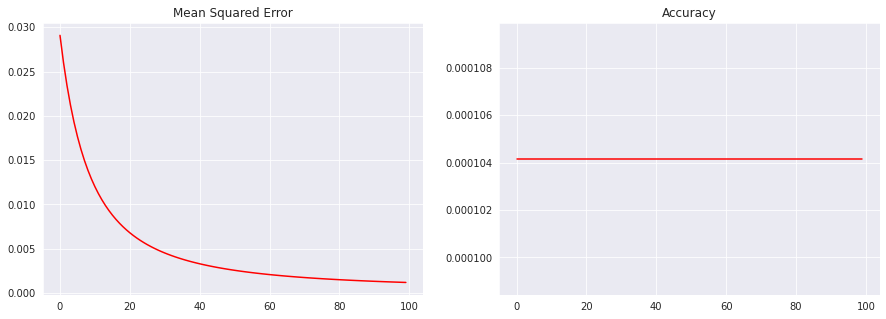

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

monitoring_df['mean_squared_error'].plot(ax=axes[0], title="Mean Squared Error", color='red')
monitoring_df['accuracy'].plot(ax=axes[1], title="Accuracy", color='red')